In [1]:
import tensorflow as tf
from tensorflow import keras

### Load Data

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()
x_train.shape

(60000, 28, 28)

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

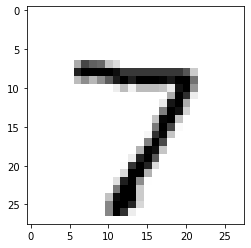

In [4]:
some_digit = x_test[0]
plt.imshow(some_digit,cmap = mpl.cm.binary)
plt.show()

In [5]:
y_test[0]

7

In [6]:
y_train.shape

(60000,)

In [7]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
input_shape = (28,28,1)

In [8]:
x_train.shape

(60000, 28, 28, 1)

In [9]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [10]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


In [12]:
x_train.shape[0]

60000

In [13]:
batch_size = 128
num_classes = 10
epochs = 100

### Build Model

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(5,5),activation='relu', input_shape=input_shape))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_classes,activation='softmax'))


In [15]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [16]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 18s 297us/sample - loss: 32.8682 - accuracy: 0.0941 - val_loss: 10.0160 - val_accuracy: 0.1232
Epoch 2/100
60000/60000 [==============================] - 17s 275us/sample - loss: 17.5219 - accuracy: 0.1187 - val_loss: 4.9586 - val_accuracy: 0.2083
Epoch 3/100
60000/60000 [==============================] - 18s 302us/sample - loss: 11.0037 - accuracy: 0.1442 - val_loss: 3.2304 - val_accuracy: 0.2843
Epoch 4/100
60000/60000 [==============================] - 17s 278us/sample - loss: 7.8187 - accuracy: 0.1644 - val_loss: 2.4861 - val_accuracy: 0.3290
Epoch 5/100
60000/60000 [==============================] - 17s 276us/sample - loss: 5.9996 - accuracy: 0.1850 - val_loss: 2.1134 - val_accuracy: 0.3623
Epoch 6/100
60000/60000 [==============================] - 17s 281us/sample - loss: 4.8435 - accuracy: 0.2021 - val_loss: 1.8907 - val_accuracy: 0.3947
Epoch 7/100
60000/60000 [=========

In [17]:
score = model.evaluate(x_test,y_test,verbose=0)

In [18]:
score

[0.35597031599879264, 0.9137]

In [19]:
model.save('handwritten_rec.h5')